<a href="https://colab.research.google.com/github/avinanakarmi/CS634_FinalTermProject_ConfusionMatrix/blob/main/ComparingClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install statsmodels

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Preprocessing

In [82]:
!pip install ucimlrepo

In [83]:
from ucimlrepo import fetch_ucirepo

htru2 = fetch_ucirepo(id=372)

X = htru2.data.features
y = htru2.data.targets

df = pd.concat([X, y], axis=1)

df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [84]:
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [85]:
print("Dataframe shape", df.shape)
print()
print("Check type of data")
print(df.dtypes)
print()
print("Check for na")
print(df.isna().sum())

Dataframe shape (17898, 9)

Check type of data
Profile_mean        float64
Profile_stdev       float64
Profile_skewness    float64
Profile_kurtosis    float64
DM_mean             float64
DM_stdev            float64
DM_skewness         float64
DM_kurtosis         float64
class                 int64
dtype: object

Check for na
Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64


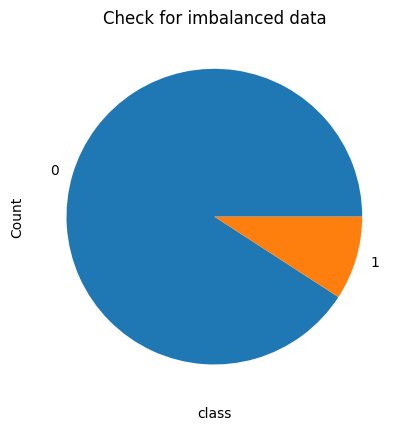

In [86]:
class_dist = df["class"].value_counts().sort_index()
plt.pie(class_dist.values, labels=class_dist.index)

plt.title("Check for imbalanced data")
plt.xlabel('class')
plt.ylabel('Count')

plt.show()

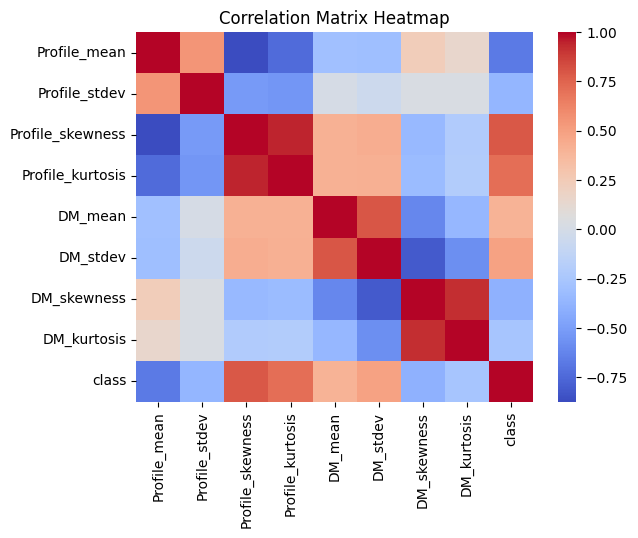

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['class'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature         VIF
0      Profile_mean   97.279032
1     Profile_stdev   77.633219
2  Profile_skewness   26.819464
3  Profile_kurtosis   16.032502
4           DM_mean    4.184163
5          DM_stdev   15.872033
6       DM_skewness  100.633763
7       DM_kurtosis   27.343508


# Model Selection


1.   **Decision Trees**:  Even though there is multicollinearity (as shown by VIF values), Decision Trees are not affected by this because they split the data based on single features at each node.
2. **Bayesian Networks**: BayNets are generally not highly sensitive to multicollinearity, as they focus on conditional independence between variables rather than direct linear relationships.
3.   **Conv1D**: The Conv1D layer applies filters across the input features in a sliding window manner.



# Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
def predict_with_random_forest(X_train, y_train, X_test):
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)
  return y_pred

# Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
def predict_with_decision_tree(X_train, y_train, X_test):
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  return y_pred

# Conv1D

In [91]:
!pip install tensorflow

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = None
def predict_with_conv1d(X_train, y_train, X_test):
  global model
  if model is None:
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
  y_pred = model.predict(X_test)
  return y_pred


# Util Functions

In [93]:
from sklearn.metrics import confusion_matrix
from typing import TypedDict
import statistics

class Measures(TypedDict):
    tpr: float
    tnr: float
    precision: float
    npv: float
    fpr: float
    fdr: float
    fnr: float
    acc: float
    f1: float
    err_rate: float
    bacc: float
    tss: float
    hss: float
    bss: float
    auc: float

def get_classification_outcomes(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn, fp, fn, tp

def visualize_model_performance(tn, fp, fn, tp ):
  print()
  print('Visualizing Model Performance')
  print(f"{'':<5} {'':<5} {'Actual':<5}")
  print(f"{'':<5} {'':<5} {'Positive':<5} {'Negative':<5}")
  print(f"{'Predicted':<5} {'Positive':<5} {tp:<5} {fp:<5}")
  print(f"{'':<5} {'Negative':<5} {fn:<5} {tn:<5}")
  print()

def safe_divide(numerator, denominator):
    if denominator == 0:
      return 0
    else:
      return numerator / denominator

def find_auc(y_true, y_pred):
  data = list(zip(y_pred, y_true))
  data.sort(reverse=True, key=lambda x: x[0])

  TP = FP = 0
  FN = sum(y_true)
  TN = len(y_true) - FN
  points = [(0, 0)]

  for score, label in data:
      if label == 1:
          TP += 1
          FN -= 1
      else:
          FP += 1
          TN -= 1

      TPR = safe_divide(TP, (TP + FN))
      FPR = safe_divide(FP, (FP + TN))

      points.append((FPR, TPR))

  auc = 0.0
  for i in range(1, len(points)):
      x1, y1 = points[i-1]
      x2, y2 = points[i]
      auc += (x2 - x1) * (y1 + y2) / 2
  return auc

def calculate_measures(y_true, y_pred) -> Measures:
  measures = {}
  tn, fp, fn, tp = get_classification_outcomes(y_true, y_pred)
  # visualize_model_performance(tn, fp, fn, tp )
  p = tp + fn
  n = tn + fp
  measures['tpr'] = safe_divide(tp, p)
  measures['tnr'] = safe_divide(tn, n)
  measures['precision'] = safe_divide(tp, (fp + tp))
  measures['npv'] = safe_divide(tn, (tn + fn))
  measures['fpr'] = safe_divide(fp, n)
  measures['fdr'] = safe_divide(fp, (fp + tp))
  measures['fnr'] = safe_divide(fn, n)
  measures['acc'] = safe_divide((tp + tn), (p + n))
  measures['f1'] = safe_divide((2 * measures['precision'] * measures['tpr']), (measures['precision'] + measures['tpr']))
  measures['err_rate'] = safe_divide((fp + fn), (p + n))
  measures['bacc'] = (measures['tpr'] + measures['tnr']) / 2
  measures['tss'] = (safe_divide(tp, (fn + tp))) - (safe_divide(fp, (fp + tn)))
  measures['hss'] = safe_divide(2 * (tp * tn - fp * fn), ((tp + fn) * (fn + tn) + (tp + fp) * (fp * tn)))
  bs = statistics.mean((y_true - y_pred) ** 2)
  y_mean = statistics.mean(y_test)
  measures['bss'] = safe_divide(bs, statistics.mean((y_test - y_mean) ** 2))
  measures['auc'] = find_auc(y_true, y_pred)

  return Measures(measures)

# Train and test dataset preparation

In [94]:
#### Visualize measure in each fold
from typing import Dict, List

def viz_measures_k_fold(k, **kwargs: Measures):
  suffix = 'th'
  if k%10 == 1: suffix = 'st'
  elif k%10 == 2: suffix = 'nd'
  elif k%10 == 3: suffix = 'rd'
  print()
  print('Visualizing Model Performance', f'in {k}{suffix} fold:' if k > 0 else '')
  print(f"{'Measure':<15}", end='')
  for model in kwargs.keys():
    print(f'{model:<15}', end='')
  print()
  tup = next(iter(kwargs.items()))
  for measure in tup[1].keys():
    print(f'{measure:<15}', end='')
    for _, measures in kwargs.items():
      print(f'{measures[measure]:<15.2f}', end='')
    print()
  print()

def viz_measures_model(model, measures: List[Measures]):
  print()
  print('Visualizing ', model, 'Performance in Each Fold')
  print(f"{'Measure':<15}", end='')
  for fold in range(1, 11):
    print(f'{fold:<15}', end='')
  print()
  for measure in measures[0].keys():
    print(f'{measure:<15}', end='')
    for k_measures in measures:
      print(f'{k_measures[measure]:<15.2f}', end='')
    print()
  print()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


rf_measures = []
dt_measures = []
conv1D_measures = []

### Ensures each fold has the same proportion of classes as the complete dataset.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for idx, (train_index, test_index) in enumerate(kf.split(X, y), start = 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = df['class'].iloc[train_index], df['class'].iloc[test_index]

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    rf_pred = predict_with_random_forest(X_resampled, y_resampled, X_test)
    rf_measures.append(calculate_measures(y_test, rf_pred))


    dt_pred = predict_with_decision_tree(X_resampled, y_resampled, X_test)
    dt_measures.append(calculate_measures(y_test, dt_pred))

    conv1d_pred = predict_with_conv1d(X_resampled, y_resampled, X_test)
    conv1d_pred = (conv1d_pred > 0.5).astype(int)
    conv1D_measures.append(calculate_measures(y_test, [item for row in conv1d_pred for item in row]))

    viz_measures_k_fold(idx, RandomForst = rf_measures[idx - 1], DecisionTree=dt_measures[idx - 1], Conv1D=conv1D_measures[idx - 1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Visualizing Model Performance  in 1st fold:
Measure        RandomForst    DecisionTree   Conv1D         
tpr            0.93           0.91           0.93           
tnr            0.99           0.95           0.98           
precision      0.89           0.66           0.82           
npv            0.99           0.99           0.99           
fpr            0.01           0.05           0.02           
fdr            0.11           0.34           0.18           
fnr            0.01           0.01           0.01           
acc            0.98           0.95           0.97           
f1             0.91           0.76           0.87           
err_rate       0.02           0.05           0.03           
bacc           0.96           0.93           0.95           
tss            0.92           0.87           0.91           
hss            0.09           0.02           0.05           
bss            0.21           0.62           0.31           
a

In [96]:
viz_measures_model("Random Forest", rf_measures)


Visualizing  Random Forest Performance in Each Fold
Measure        1              2              3              4              5              6              7              8              9              10             
tpr            0.93           0.85           0.89           0.90           0.90           0.91           0.88           0.84           0.89           0.90           
tnr            0.99           0.99           0.98           0.98           0.99           0.99           0.98           0.98           0.98           0.98           
precision      0.89           0.87           0.79           0.83           0.86           0.87           0.83           0.81           0.85           0.84           
npv            0.99           0.98           0.99           0.99           0.99           0.99           0.99           0.98           0.99           0.99           
fpr            0.01           0.01           0.02           0.02           0.01           0.01           0.02        

In [97]:
viz_measures_model("Decision Tree", dt_measures)


Visualizing  Decision Tree Performance in Each Fold
Measure        1              2              3              4              5              6              7              8              9              10             
tpr            0.91           0.81           0.87           0.88           0.90           0.91           0.87           0.85           0.87           0.87           
tnr            0.95           0.96           0.95           0.95           0.96           0.96           0.95           0.96           0.96           0.95           
precision      0.66           0.69           0.65           0.65           0.69           0.69           0.65           0.67           0.69           0.66           
npv            0.99           0.98           0.99           0.99           0.99           0.99           0.99           0.98           0.99           0.99           
fpr            0.05           0.04           0.05           0.05           0.04           0.04           0.05        

In [98]:
viz_measures_model("Conv 1D", conv1D_measures)


Visualizing  Conv 1D Performance in Each Fold
Measure        1              2              3              4              5              6              7              8              9              10             
tpr            0.93           0.90           0.92           0.93           0.93           0.93           0.90           0.88           0.93           0.91           
tnr            0.98           0.98           0.97           0.97           0.98           0.98           0.98           0.97           0.97           0.95           
precision      0.82           0.83           0.78           0.79           0.81           0.80           0.81           0.74           0.78           0.64           
npv            0.99           0.99           0.99           0.99           0.99           0.99           0.99           0.99           0.99           0.99           
fpr            0.02           0.02           0.03           0.03           0.02           0.02           0.02           0.0

In [99]:
## Average measures
def calc_avg_measures(measures):
  fpr_values, tpr_values = [], []
  avg = {}
  metrics = measures[0].keys();
  for metric in metrics:
    for i in range(0, 10):
      avg[metric] = avg.get(metric, 0) + measures[i][metric]
      if metric == 'fpr':
        fpr_values.append(measures[i][metric])
      elif metric == 'tpr':
        tpr_values.append(measures[i][metric])
    avg[metric] = avg[metric] / 10
  return avg

viz_measures_k_fold(0, RandomForest = calc_avg_measures(rf_measures), DecisionTree=calc_avg_measures(dt_measures), Conv1D=calc_avg_measures(conv1D_measures))


Visualizing Model Performance  
Measure        RandomForest   DecisionTree   Conv1D         
tpr            0.89           0.87           0.91           
tnr            0.98           0.96           0.97           
precision      0.84           0.67           0.78           
npv            0.99           0.99           0.99           
fpr            0.02           0.04           0.03           
fdr            0.16           0.33           0.22           
fnr            0.01           0.01           0.01           
acc            0.97           0.95           0.97           
f1             0.87           0.76           0.84           
err_rate       0.03           0.05           0.03           
bacc           0.94           0.92           0.94           
tss            0.87           0.83           0.89           
hss            0.06           0.02           0.04           
bss            0.30           0.61           0.39           
auc            0.96           0.94           0.96   

In [101]:
def visualize_roc(y_test, y_pred, predictor):
  from sklearn.metrics import roc_curve, auc
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color="darkorange", label=f'Area: {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f'ROC Curve for {predictor} Predictions')
  plt.legend(loc="lower right")
  plt.show()

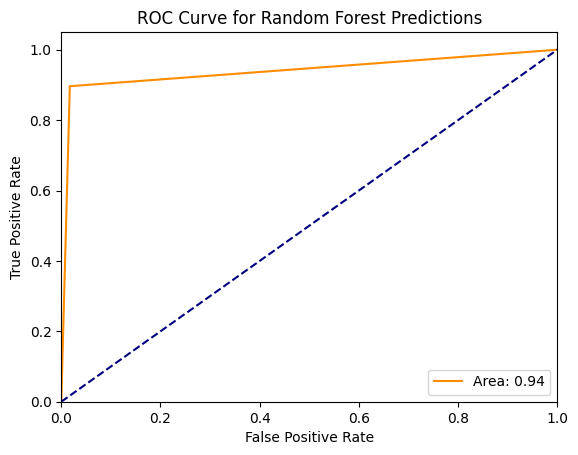

In [102]:
visualize_roc(y_test, rf_pred, "Random Forest")

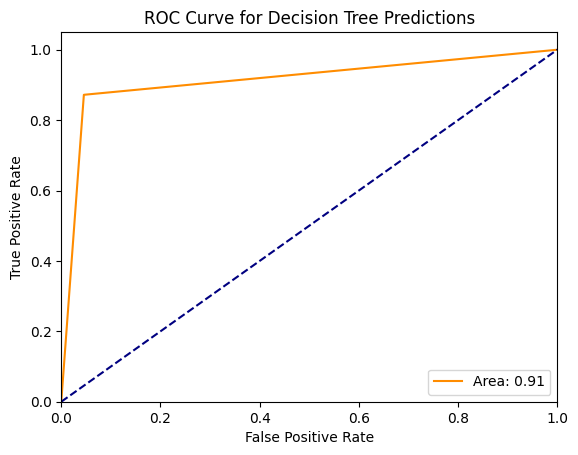

In [103]:
visualize_roc(y_test, dt_pred, "Decision Tree")

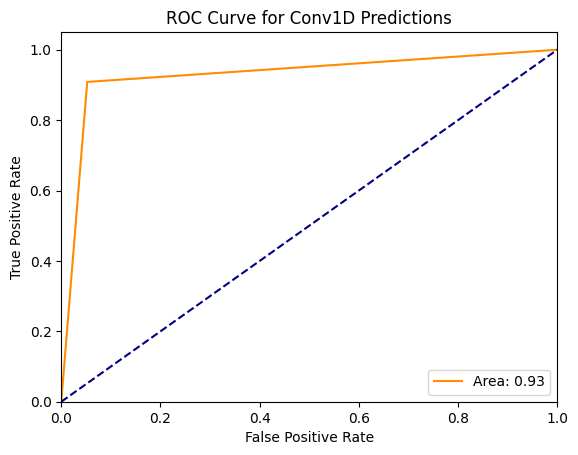

In [104]:
visualize_roc(y_test, conv1d_pred, "Conv1D")